# Elvis Revisited

Jonah Spicher

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite
import numpy as np
import matplotlib.pyplot as plt

import thinkplot

### The Problem
The Elvis problem comes from David MacKay, and it goes like this:

_Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin?_

The solution to this problem is sneaky, and it relies on using a piece of data hidden in the statement of the problem. But first, a prior. A bit of research reveals that about 8% of twins are monozygous, giving us this (pretty straightforward) prior distribution:

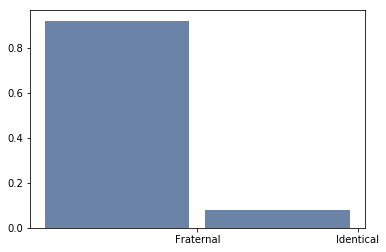

In [2]:
twins = Pmf(['Identical', 'Fraternal'])
twins['Identical'] = 0.08
twins['Fraternal'] = 0.92
thinkplot.Hist(twins)

Intially, it seems that this is as good of a guess as we can make. The clever insight, however, is that in this one sentence problem, "Elvis had a twin brother who died at birth," we were given one piece of data: gender. We know that Elvis' twin was a brother, and from this we can use Bayesian inference to update our belief that Elvis was an identical twin.

A reasonable assumption to make is that a fraternal twin's gender is not connected to its twin, giving a likelihood of 0.5 given the data, and that for identical twins, the gender must be the same, giving a likelihood of 1 (technically, identical twins are sometimes born opposite genders, but so infrequently that 1 is a fair approximation).

Now that we have this data, the update is actually very easy to perform. We can just multiply each prior by the new likelihood, and then normalize.

In [4]:
twins_post = twins.Copy()
twins_post['Identical'] *= 1 #This line is sort of unnecessary, but shows the whole updating process
twins_post['Fraternal'] *= 0.5
twins_post.Normalize()
print(twins_post, '\n')
print('Likelihood of Identical Twins: %s' %twins_post['Identical'])

Pmf({'Identical': 0.14814814814814814, 'Fraternal': 0.8518518518518517}) 

Likelihood of Identical Twins: 0.14814814814814814


This almost doubles the probability of identical twins to about 15%, a surprisingly impactful result for such a small piece of data.

### Additional data?
My argument is that we are given more than just this piece of data, and in fact that this one is relatively minor next to the simultaneously more and less obvious bit of information also in the first sentence: Elvis' brother _died._ 

Today, the infant mortality rate for identical twins is about 0.4 to 0.5 (found [here](https://www.diffen.com/difference/Fraternal_Twins_vs_Identical_Twins#Risks)). This is much higher than either "singletons" or fraternal twins, mostly due mostly to the increased risk of umbilical cord tangling. For fraternal twins, the rate is 20 in 1000, or 0.02(found [here](https://www.nhs.uk/news/pregnancy-and-child/twins-more-likely-to-die-before-first-birthday/), but only in the UK). It might actually be more fair to say that the death rate among fraternal twins is about 5 times higher than that of the general poulation, which seems to be true [internationally](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1365-3156.2007.01959.x), giving numbers closer to 0.25 in developing nations.). 

But that information is all for today, and Elvis was not born today; he was born in 1935. Obviously, the modern world will have slightly different infant mortality rates from 1935 Mississippi. Fortunately for us, most of the data we need exists in [this](https://www.cdc.gov/nchs/data/vsushistorical/birthstat_1935.pdf) very commonly cited study, coincidentally done in 1935. It gives us pretty accurate numbers for twins, which tell us that the mortality rate for twins in 1935 in Mississippi was 0.13. Next, we have to extrapolate a little bit. The two numbers I used in the paragraph above this one were both world averages. This means they factor in both rich, developed countries and poorer developing ones. Coincidentally, this seems to give a good approximation for most of the numbers for infant mortality rates in 1935 Mississipi. Overall infant mortality rates match within a couple percentage points, and taking the 5 times overall mortality rate rule into effect, it isn't far off. 

For this reason (and I want this to be clear), I am making a pretty bold assumption: the world average for identical twin mortality rates is probably about equal to what it was in Mississippi in 1935. The resulting numbers are only as valid as you think that claim is. But, operating on that assumption, we get a Likelihood that he died being an identical twin of 0.45, and a likelihood that he died as a fraternal twin of 0.13. We perform the update to the previous posterior:

In [5]:
twins_post2 = twins_post.Copy()
twins_post2['Identical'] *= 0.45
twins_post2['Fraternal'] *= 0.13
twins_post2.Normalize()
print(twins_post2, '\n')
print('Likelihood of Identical Twins: %s' %twins_post2['Identical'])

Pmf({'Identical': 0.3757828810020877, 'Fraternal': 0.6242171189979123}) 

Likelihood of Identical Twins: 0.3757828810020877


This gives a 37.5% chance that Elvis was an identical twin. This more than doubled the probability of identical twins to over one third. This evidence is actually stronger than the fact that the twins were brothers. 

To quantify how much stronger this evidence was, we can calculate the Bayes factor for each piece of data, which is the likelihood of the data under one hypothesis divided by the likelihood under the other. For gender, that works out to 1/0.5 or 2 in favor of Identical twins, while death gives 0.45/0.13 or 3.46, which is much closer to significant than the factor given by gender.

So it turns out that death is in fact a stronger piece of evidence, and the Elvis problem was even more subtle than previously thought.